<a href="https://colab.research.google.com/github/madelvallez/Cours/blob/master/NSI/Chap12/COURS_Diviser_Regner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diviser pour Régner 

#### Histoire


Le principe "**diviser pour régner**" ("divide and conquer") est un principe militaire ancestral. Cette stratégie était déjà mise en avant par Jules César "divide et impera", elle est reprise également dans les écrits politiques de Nicolas Machiavel ([article wikipédia sur Machiavel](https://fr.wikipedia.org/wiki/Nicolas_Machiavel)).

#### En algorithmique


Le **diviser pour régner** est une méthode  basée sur le principe suivant :
On prend un problème (généralement complexe à résoudre), on **divise ce problème** en une multitude de petits problèmes, l'idée étant que les "petits problèmes" seront **plus simples à résoudre** que le problème original. Une fois les petits problèmes résolus, **on recombine** les "petits problèmes résolus" afin d'obtenir la solution du problème de départ.





#### A savoir


La méthode de "Diviser pour régner" en algorithmique se décompose en **trois étapes** :

1. **Diviser** : le problème d'origine est divisé en un certain nombre de sous-problèmes.
2. **Régner** : on résout les sous-problèmes (les sous-problèmes sont plus faciles à résoudre que le problème d'origine).
3. **Fusionner ou Combiner** : on fusionne (ou combine) les solutions des sous-problèmes afin d'obtenir la solution du problème d'origine.

# Un premier exemple : recherche du minimum des valeurs d'un tableau. 

## 1. Algorithme "classique"

#### Compléter la fonction suivante, qui utilise l'algorithme classique de recherche d'un minimum

In [ ]:
def minimum(t):
    if len(t) == 0:
        return None
    minimum_temporaire = t[0]
    for i in range(1, len(t)):
        if t[i] < minimum_temporaire  : 
            minimum_temporaire = t[i]
    return minimum_temporaire

assert minimum([10,20,30,40,50]) == 10
assert minimum([50,40,30,20,10])== 10
assert minimum([-10,-20,-30,40,50]) == -30

#### Quelle est la complexité en temps d'un tel algorithme ? Expliquer!

Dans le pire des cas (et en fait dans tous les cas) la complexité de cette fonction est ... *linéaire car on parcours tout le tableau.*

### Comment "diviser" le problème ?

Exemple : on cherche quelle est la plus petite valeur d'un paquet de 8 cartes. 

* Pour un être humain, un simple coup d'oeil suffit, mais pour un ordinateur, la comparaison n'est possible qu'entre 2 cartes. 
* On va donc "cacher" les cartes, et chercher le minimum en ne découvrant au maximum que 2 cartes à la fois. 
* Proposer une "division" de ce problème pour un groupe de 4 élèves.

Chaque élève prend 2 carte et garde la plus petite

Par groupe de 2 on compare les 4 cartes soties du lot.

Ensuite, de même avec les 2 dernières. 

#### rappel : slice (tranche) extrait d'un tableau

On utilisera cette syntaxe pour diviser le tableau en deux parties

In [ ]:
t = [0,11,22,33,44,55,66,77]

In [ ]:
t[0]

0

In [ ]:
t[6]

66

In [ ]:
t[2:4]

[22, 33]

In [ ]:
t[3:len(t)]

[33, 44, 55, 66, 77]

In [ ]:
t[0:3]

[0, 11, 22]

In [ ]:
t[4:]

[44, 55, 66, 77]

In [ ]:
t[:4]

[0, 11, 22, 33]

**Attention**: la borne de **fin** est **exclue**

#### recherche d'un minimum par méthode "diviser-régner"

In [ ]:
def minimum(liste):
    taille = len(liste)
    if taille == 1 :
        return liste[0]
    else :
        milieu = taille // 2
        x = minimum(liste[:milieu])
        y = minimum(liste[milieu:])
        if x < y :
            return x
        else :
            return y

print(minimum([23,12,4,56,35,57,3,11]))

3


Observer l'exécution sur [PythonTutor](http://www.pythontutor.com/visualize.html#code=def%20minimum%28liste%29%3A%0A%20%20%20%20taille%20%3D%20len%28liste%29%0A%20%20%20%20if%20taille%20%3D%3D%201%20%3A%0A%20%20%20%20%20%20%20%20return%20liste%5B0%5D%0A%20%20%20%20else%20%3A%0A%20%20%20%20%20%20%20%20milieu%20%3D%20taille%20//%202%0A%20%20%20%20%20%20%20%20x%20%3D%20minimum%28liste%5B%3Amilieu%5D%29%0A%20%20%20%20%20%20%20%20y%20%3D%20minimum%28liste%5Bmilieu%3A%5D%29%0A%20%20%20%20%20%20%20%20if%20x%20%3C%20y%20%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20return%20x%0A%20%20%20%20%20%20%20%20else%20%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20return%20y%0A%0Aprint%28minimum%28%5B23,12,4,56,35,57,3,11%5D%29%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

#### Dans cet exemple, préciser quelles lignes de code correspondent à chacune des parties de la méthode : 



* diviser: 
     `
        milieu = taille // 2
        x = minimum(liste[:milieu])
        y = minimum(liste[milieu:])
    `
* régner: 
    `
        return liste[0]
    `
* fusionner: 
    `
        if x < y :
            return x
        else :
            return y
    `

#### La méthode Diviser-Régner permet-elle d'améliorer la complexité en temps de la recherche du minimum ?

La complexité en temps avec l'algorithme classique est linéaire. La méthode diviser pour reigner ne permet pas d'améliorer la visesse d'execution: elle reste linéaire:
$n/2+n/2=n$

# Deuxième exemple : trier un tableau

#### Rappels : tri par sélection

In [ ]:
def tri_par_selection(t):
    # t[0:i] est trié et ses valeurs sont inférieures ou égales à celles de t[i:] qi n'est pas trié
    for i in range(len(t)-1): 
        # on cherche l'indice du minimum de t[i:]
        i_min = i 
        for k in range(i+1, len(t)): 
            if t[i_min] > t[k] :
                i_min = k
        # on range ce minimum à l'indice i (avant de poursuivre à l'indice i+1)
        t[i], t[i_min] = t[i_min], t[i] 
    return t

#### approche de la complexité en temps du tri par sélection

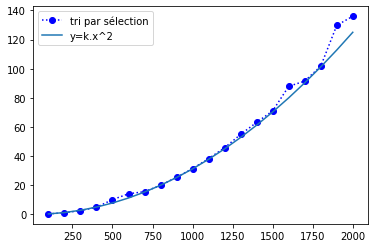

3.125e-05


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter
from random import random

def chrono_tri_sur_taille(n):
    ''' renvoie le temps (en milliseconde) d'exécution du tri par selection
    sur un tableau aléatoire de 'n' nombres flottants'''
    t = [random() for i in range(n)]
    start = perf_counter()
    tri_par_selection(t)
    stop = perf_counter()
    return 1000*(stop - start)

# Tri sur des tableaux de taille 100, 200, ... 2000
abs = []
ord = []
for n in range(100,2001,100):
    abs.append(n)
    ord.append(chrono_tri_sur_taille(n))
# graphique
x = np.array([1, 3, 4, 6])
y = np.array([2, 3, 5, 1])
plt.plot(np.array(abs), np.array(ord),  "b:o",label="tri par sélection")

# fonction carrée (k.x^2)
abs = []
ord = []
k = 125/(4e6)
for n in range(100,2001,100):
    abs.append(n)
    ord.append(k* n**2)
plt.plot(np.array(abs), np.array(ord),label="y=k.x^2")
plt.legend()
plt.show() # affiche la figure a l'ecran
print (k)

On dit que la complexité du tri par sélection est **quadratique**

## Diviser

Quel est le rôle de cette fonction ? 

On pourra observer l'exécution d'un exemple sur [PythonTutor](http://www.pythontutor.com/visualize.html#code=def%20division%28liste%29%3A%0A%20%20%20%20taille%20%3D%20len%28liste%29%20%20%20%20%0A%20%20%20%20milieu%20%3D%20taille%20//%202%0A%20%20%20%20return%20liste%5B%3Amilieu%5D,%20liste%5Bmilieu%3A%5D%0A%0Aprint%28division%28%5B3,4,6,2,5,1,8,7,9%5D%29%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

In [ ]:
def division(liste):
    taille = len(liste)    
    milieu = taille // 2
    return liste[:milieu], liste[milieu:]

print(division([3,4,6,2,5,1,8,7,9]))

([3, 4, 6, 2], [5, 1, 8, 7, 9])


## Régner

A force de diviser une liste en listes "deux fois plus petites", on finit la "division" en obtenant des listes réduites à un seul élément : chacune de ces listes est donc triée ! 

## Fusionner

Le problème principal consiste donc à fusionner deux listes. 
* chacune des listes à fusionner est déjà triée par ordre croissant
* le résultat de la fusion doit être trié par ordre croissant. 

#### méthode

pour décrire la méthode de fusion, on peut comparer avec la situation suivante : 


* on possède deux piles de cartes.
* chaque pile est triée par ordre croissant

Comment fusionner ces deux piles de cartes ? 

In [ ]:
def fusion(gauche,droite):
    if   gauche == []          : return droite
    elif droite == []          : return gauche
    elif gauche[0] < droite[0] : return [gauche[0]] + fusion(gauche[1:],droite)
    else                       : return [droite[0]] + fusion(gauche,droite[1:])


Ecrire les appels récursifs exécutés par : 
`fusion([20,30,40,60],[10,50,70,80])`

#### réponse... 



```
fusion([20,30,40,60],[10,50,70,80])
=
 [10] + fusion( [20, 30, 40, 60] , [50, 70, 80] )
        [20] + fusion( [30, 40, 60] , [50, 70, 80] )
               [30] + fusion( [40, 60] , [50, 70, 80] )
                      [40] + fusion( [60] , [50, 70, 80] )
                             [50] + fusion( [60] , [70, 80] )
                                    [60] + fusion( [] , [70, 80] )
                                           [70, 80]
= [10, 20, 30, 40, 50, 60, 70, 80]
```



In [ ]:
def appels_recursifs_fusion(gauche,droite,prof=0):
    if   gauche == []          : 
        print('       '*prof, droite)
        return droite
    elif droite == []          : 
        print('       '*prof, gauche)
        return gauche
    elif gauche[0] < droite[0] : 
        print('       '*prof, [gauche[0]], '+', "fusion(",gauche[1:],',',droite,")" )
        return [gauche[0]] + appels_recursifs_fusion(gauche[1:],droite,prof+1)
    else                       : 
        print('       '*prof, [droite[0]], '+', "fusion(",gauche,',',droite[1:],")" )
        return [droite[0]] + appels_recursifs_fusion(gauche,droite[1:],prof+1)

appels_recursifs_fusion([20,30,40,60],[10,50,70,80])

## Tri-fusion

In [ ]:
def tri_fusion(liste):
    if len(liste) <= 1 :
        return liste
    else :
        gauche, droite = division(liste)
        return fusion (tri_fusion(gauche), tri_fusion(droite))

Ecrire les appels récursifs exécutés par : 
`tri_fusion([3,4,6,2,5,1,8,7,9])`

#### réponse



```
tri_fusion([3,4,6,2,5,1,8,7,9])
=
fusion(TF( [3, 4, 6, 2] ),TF( [5, 1, 8, 7, 9] ))
         fusion(TF( [3, 4] ),TF( [6, 2] ))
                 fusion(TF( [3] ),TF( [4] ))
                 => [3, 4]
                 fusion(TF( [6] ),TF( [2] ))
                 => [2, 6]
         => [2, 3, 4, 6]
         fusion(TF( [5, 1] ),TF( [8, 7, 9] ))
                 fusion(TF( [5] ),TF( [1] ))
                 => [1, 5]
                 fusion(TF( [8] ),TF( [7, 9] ))
                         fusion(TF( [7] ),TF( [9] ))
                         => [7, 9]
                 => [7, 8, 9]
         => [1, 5, 7, 8, 9]
 => [1, 2, 3, 4, 5, 6, 7, 8, 9]
```



In [ ]:
space = '        '
def appels_recursifs_tri_fusion(liste, prof=0):
    if len(liste) <= 1 :
        return liste
    else :
        gauche, droite = division(liste)
        print(space*prof, 'fusion(TF(', gauche, '),TF(', droite, '))')
        resu = fusion (appels_recursifs_tri_fusion(gauche, prof+1), 
                       appels_recursifs_tri_fusion(droite, prof+1))
        print(space*prof, '=>', resu)
        return resu

appels_recursifs_tri_fusion([3,4,6,2,5,1,8,7,9])

## Efficacité du tri-fusion

#### tri par sélection vs tri fusion

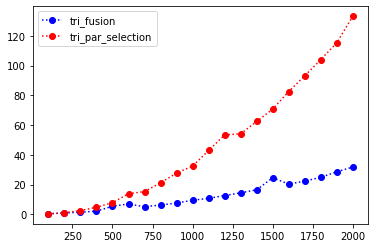

2913

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter
from random import random

import sys
sys.setrecursionlimit(2500)
import gc
gc.disable()

def chrono_tri_sur_taille(n,f):
    ''' renvoie le temps (en milliseconde) d'exécution du tri par selection
    sur un tableau aléatoire de 'n' nombres flottants'''
    t = [random() for i in range(n)]
    start = perf_counter()
    f(t)
    stop = perf_counter()
    return 1000*(stop - start)

# Tri fusion sur des tableaux de taille 100, 200, ... 2000
abs = []
ord = []
for n in range(100,2001,100):
    abs.append(n)
    ord.append(chrono_tri_sur_taille(n,tri_fusion))
# graphique
x = np.array([1, 3, 4, 6])
y = np.array([2, 3, 5, 1])
plt.plot(np.array(abs), np.array(ord),  "b:o",label="tri_fusion")

# Tri par sélection sur des tableaux de taille 100, 200, ... 2000
abs = []
ord = []
for n in range(100,2001,100):
    abs.append(n)
    ord.append(chrono_tri_sur_taille(n,tri_par_selection))
# graphique
x = np.array([1, 3, 4, 6])
y = np.array([2, 3, 5, 1])
plt.plot(np.array(abs), np.array(ord),  "r:o",label="tri_par_selection")



plt.legend()
plt.show() # affiche la figure a l'ecran
gc.collect()

#### approche de la complexité en temps du tri fusion

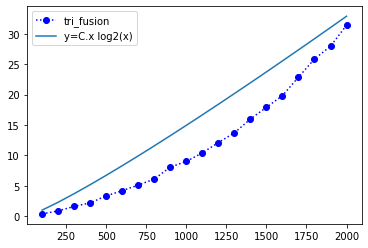

2906

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter
from random import random

import sys
sys.setrecursionlimit(2500)
import gc
gc.disable()

def chrono_tri_sur_taille(n,f):
    ''' renvoie le temps (en milliseconde) d'exécution du tri par selection
    sur un tableau aléatoire de 'n' nombres flottants'''
    t = [random() for i in range(n)]
    start = perf_counter()
    f(t)
    stop = perf_counter()
    return 1000*(stop - start)

# Tri fusion sur des tableaux de taille 100, 200, ... 2000
abs = []
ord = []
for n in range(100,2001,100):
    abs.append(n)
    ord.append(chrono_tri_sur_taille(n,tri_fusion))
# graphique
x = np.array([1, 3, 4, 6])
y = np.array([2, 3, 5, 1])
plt.plot(np.array(abs), np.array(ord),  "b:o",label="tri_fusion")


from math import log2

abs = []
ord = []
c=0.0015
for n in range(100,2001,100):
    abs.append(n)
    ord.append(c* n*log2(n))
plt.plot(np.array(abs), np.array(ord),label="y=C.x log2(x)")

plt.legend()
plt.show() # affiche la figure a l'ecran
gc.collect()

## **A RETENIR**

La complexité du tri fusion est d'ordre n log2(n)

Notation :  $O(n . log_2(n))$ 

#### **Justification**
* Fusionner une liste de taille n et une liste de taille m, le coût est de l'ordre de n+m (puisque chaque terme de chaque liste est parcouru exactement une fois)
* le tri fusion sur une liste de taille $n = 2^k$ nécessite : 
   * $2^0 = 1$ fusion de listes de taille $n/2$ soit  $n/2 + n/2 = n$
   * $2^1 = 2$ fusions de listes de taille $n/4$ soit  $2(n/4 + n/4) = n$
   * $2^2 = 4$ fusions de listes de taille $n/8$ soit  $4(n/8 + n/8) = n$
   * ... 
   * $2^{k-1}$ fusions de listes de taille $n/{2^k}$ soit  $2^{k-1}(n/2^{k} + n/2^{k}) = n$

On a un total de k étape, et chaque étape possède un coût d'ordre n, donc le total est d'ordre $k.n$  avec $k = log_2(n)$

![diviser pour régner en optimisant la complexité en taille](https://frederic-junier.org/wp/wp-content/uploads/2020/10/rotation-dragon-2.gif)